# 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Read data

In [2]:
df = pd.read_excel("transaction.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


This dataset contains 3 months' worth of transactions for 100 customers which includes purchases, recurring transactions and salary transactions.

- Description of Column Data. 

In [3]:
pd.DataFrame({"Columns": df.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


In [4]:
print("Data shape: ", df.shape)

Data shape:  (12043, 23)


# 2. Basic checks

## 2.1 Unique customers, unique transactions and 3 months of data

Before we explore explore each column individually, let's check for the following:

- 100 unique customers (customer_id)
- Each row corresponds to a unique transaction ID (transaction_id)
- 3 months worth of data (date)

In [5]:
print("Number of unique customer ID's: ", df['customer_id'].nunique())

Number of unique customer ID's:  100


- There are 100 __Unique Customer ID__ 

In [6]:
print("Number of Rows in dataset: ", len(df))
print("Number of Unique Transaction ID's: ", df['transaction_id'].nunique())

Number of Rows in dataset:  12043
Number of Unique Transaction ID's:  12043


Number of unique transaction ID's are equal to the number of rows in the dataset which suggests that each row represent a single, unique transaction. 

In [7]:
df['date'].nunique()

91

In [8]:
df['date'].describe()

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

As there is 3 month data, starting from 1/8/2018 to 31/10/2018. But, there are only 91 unique days which means that there is one missing day.

In [9]:
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(df['date'])

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

We have one missing date on 16/8/2018.

## 2.2 Non-null count and data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

The info function provides information about the data types and presence of missing values in each column of the dataset. 

## 2.3 Missing values 

In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(df), 3) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Both __bpay_biller_code__ and __merchant_code__ columns contain a very large number of missing values. 

## 2.4 Descriptive statistics of numerical variables 

In [12]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


- With help of this we could detect any unusual behaviour in dataset __For example__, we can check if the age and amount columns contain any negative values,if age is any absurd value like 200 etc. 
- Here, I did not see any unusual behaviour.

- It also provides an overview of some basic statistics for the amount column. 

However, we do not know the breakdown of these transaction amounts for example, what sort of transactions are they, who made them etc.

We can see see a huge spread between the maximum and minimum amount in the balance and amount columns. We will look into this further. 

# 3. Exploratory data analysis (EDA)

## 3.1 Categorical variables

Some columns would be Skipped as they are used only for identifiers not provide significant information to us:
- bpay_biller_code
- account
- merchant_id
- merchant_code
- first_name
- transaction_id
- customer_id

## 3.1.1 Status

In [13]:
df['status'].value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

Status of of the individual transactions: __authorised__ means transaction has already been approved, __posted__ means still in the process. 

## 3.1.2 Card present flag

In [14]:
df['card_present_flag'].value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

- __Card Not Present__ transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It's most common for orders that happen remotely over the phone, internet or mail.

## 3.1.3 Currency of transaction

In [15]:
df['currency'].value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

- All transactions are made in AUD. 
- This column could be dropped as it only contain a single value for all data and removing it would not make a much effect.

## 3.1.4 Longitude and latitude

In [16]:
df['long_lat'].head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

These are the coordinates where the transactions were made. 

## 3.1.5 Transaction description (Types of Transactions)

In [17]:
df['txn_description'].value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, 'Number of transactions by category')

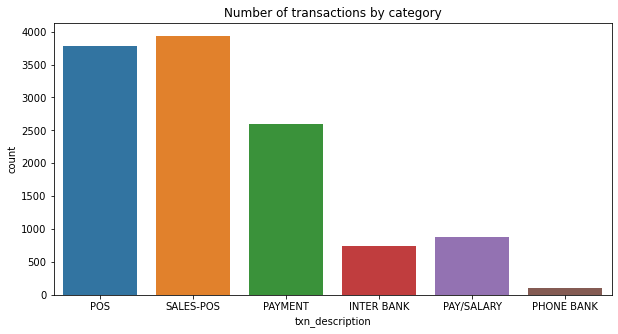

In [18]:
plt.figure(figsize = (10, 5))
sns.countplot(df['txn_description'])
plt.title("Number of transactions by category")

These are the descriptions for each transaction. Transactions mostly consist of sales payment. 

- Now Average transaction amount for each Description is Calculated

In [19]:
df[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

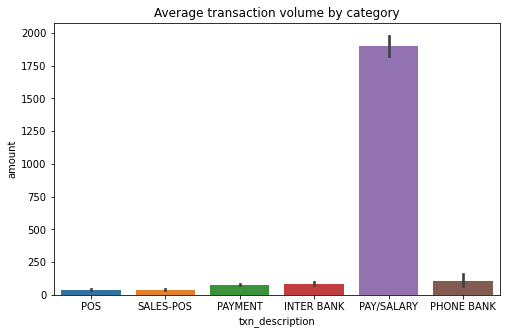

In [20]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = df)
plt.title("Average transaction volume by category")

In [21]:
df[["txn_description", "amount"]].groupby("txn_description", as_index = True).describe()

amount                                                       \
                  count         mean          std    min       25%       50%   
txn_description                                                                
INTER BANK        742.0    86.699461   198.706044   16.0    26.000    39.000   
PAY/SALARY        883.0  1898.728029  1150.364621  576.0  1013.670  1626.480   
PAYMENT          2600.0    77.613077   152.310315   15.0    32.000    42.500   
PHONE BANK        101.0   106.099010   245.999695   21.0    36.000    43.000   
POS              3783.0    40.407412   165.771678    0.1    12.035    19.430   
SALES-POS        3934.0    39.909789   132.734185    0.1    12.160    20.035   

                                    
                      75%      max  
txn_description                     
INTER BANK         83.000  1956.00  
PAY/SALARY       2538.680  8835.98  
PAYMENT            70.000  1981.00  
PHONE BANK         67.000  1916.00  
POS                33.155  7081.09  
SALES-POS          34.575  4233.00

- Pay/salary has the largest average transaction volume. 

## 3.1.6 Gender

In [22]:
df['gender'].value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of transactions by gender')

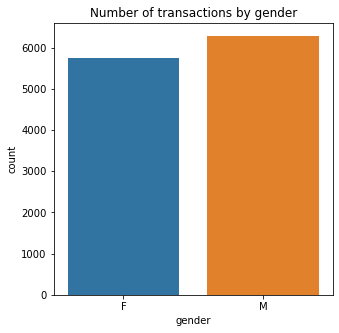

In [23]:
plt.figure(figsize = (5, 5))
sns.countplot(df['gender'])
plt.title("Number of transactions by gender")

There are more male customer transactions than there are female.
- Now find Average transcation amount for Male and Female

In [24]:
df[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

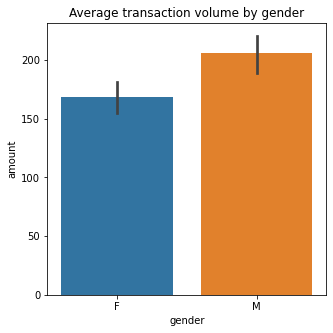

In [25]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "gender", y = "amount", data = df)
plt.title("Average transaction volume by gender")

Male has a higher average transaction volume as compare to Female. 

## 3.1.7 Merchant suburb

In [26]:
df['merchant_suburb'].value_counts(dropna = False)

NaN              4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
                 ... 
Double Bay          1
Loxton              1
Banora Point        1
Tolland             1
Wonthella           1
Name: merchant_suburb, Length: 1610, dtype: int64

These are the suburbs where the transactions were made. 

## 3.1.8 Merchant state

In [27]:
df['merchant_state'].value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Number of transactions by state')

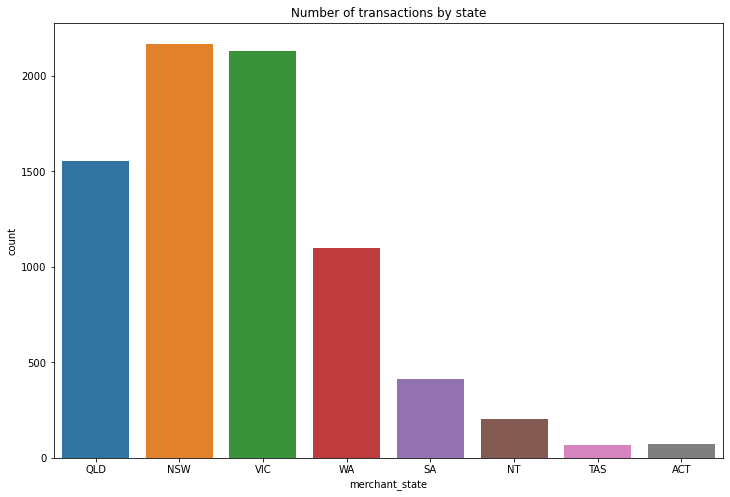

In [28]:
plt.figure(figsize = (12, 8))
sns.countplot(df['merchant_state'])
plt.title("Number of transactions by state")

Similar to merchant suburb, these are the states where the transactions were made.

- NSW and VIC are the states with maximium number of transactions. 

In [29]:
df[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount", ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


In [30]:
df[["merchant_state", "amount"]].groupby("merchant_state", as_index = True).describe()

amount                                                         \
                 count       mean         std   min      25%     50%      75%   
merchant_state                                                                  
ACT               73.0  66.803836  201.821548  4.50  10.9500  22.910  33.4700   
NSW             2169.0  47.036316  146.858464  0.10  13.3100  22.530  40.7900   
NT               205.0  44.726293  138.170485  1.71  12.5200  17.810  31.1200   
QLD             1556.0  34.372397  218.024779  0.10   9.2875  14.700  25.8800   
SA               415.0  40.425470   87.115715  3.28  14.1500  22.120  35.9050   
TAS               68.0  28.866618   26.782770  7.35  13.7150  22.080  29.0700   
VIC             2131.0  41.099953  130.790309  0.10  14.0350  21.730  35.4750   
WA              1100.0  30.901873   72.522139  2.05  11.4300  18.365  28.7725   

                         
                    max  
merchant_state           
ACT             1348.47  
NSW             4233.00  
NT              1285.09  
QLD             7081.09  
SA               909.61  
TAS              133.31  
VIC             3680.71  
WA              1692.56

Text(0.5, 1.0, 'Average transaction volume by state')

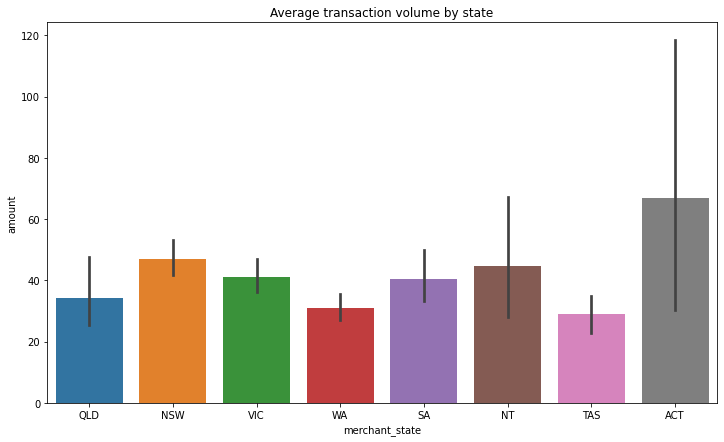

In [31]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = df)
plt.title("Average transaction volume by state")

- ACT has the highest average transaction volume but the __Variance__ is quite large. 

## 3.1.9 Extraction

In [32]:
df['extraction'].head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be the timestamp for each transaction. We can cross-reference this with the date column.

In [33]:
df[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


Since we already have an existing date column, from extraction we can put out time. 

## 3.1.10 Country

In [34]:
df['country'].value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

- As country is same i.e. Australia this column coud be drop off as it's not much significant.

## 3.1.11 Merchant longitude and latitude

In [35]:
df['merchant_long_lat'].head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are the coordinates of the merchants' location.

## 3.1.12 Movement (debit/credit)

In [36]:
df['movement'].value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

Text(0.5, 1.0, 'Number of transactions by movement')

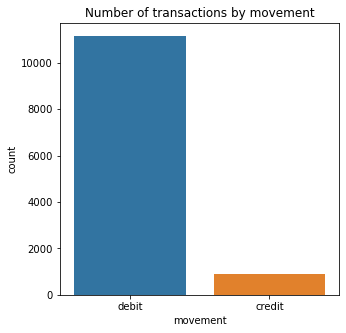

In [37]:
plt.figure(figsize = (5 ,5))
sns.countplot(df['movement'])
plt.title("Number of transactions by movement")

Most transactions are overwhelmingly debit transactions. 

Text(0.5, 1.0, 'Average transaction volume by movement')

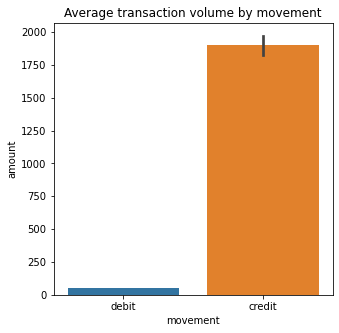

In [38]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = df)
plt.title("Average transaction volume by movement")

However, the average transaction amount for credit transactions are much higher.

## 3.2 Quantitative variables

## 3.2.1 Balance

Text(0.5, 1.0, 'Balance distribution')

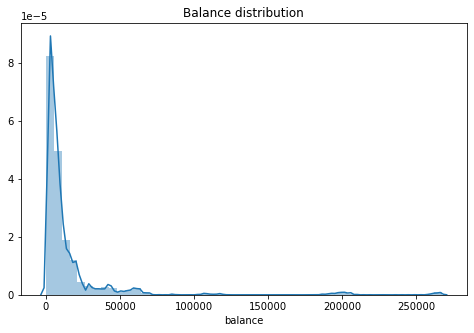

In [39]:
plt.figure(figsize = (8, 5))
sns.distplot(df['balance'])
plt.title("Balance distribution")

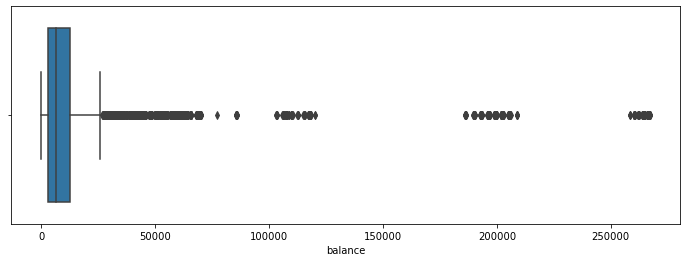

In [40]:
plt.figure(figsize = (12, 4))
sns.boxplot(df['balance'])

Distribution of the balance feature has a long tail. 

## 3.2.2 Age of customers

Text(0.5, 1.0, 'Age distribution')

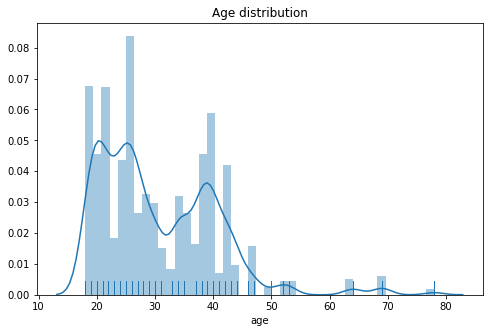

In [41]:
plt.figure(figsize = (8, 5))
sns.distplot(df['age'],rug=True)
plt.title("Age distribution")

Majority of the customers belong in the 20-25 age bracket. 

## 3.2.3 Transaction amount

Text(0.5, 1.0, 'Amount distribution')

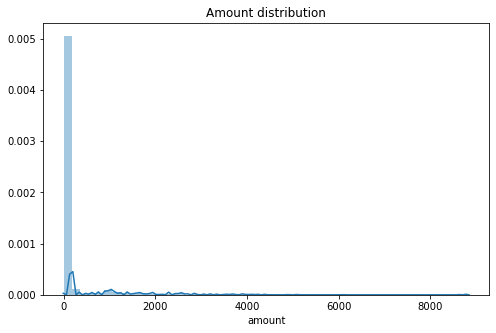

In [42]:
plt.figure(figsize = (8, 5))
sns.distplot(df['amount'])
plt.title("Amount distribution")

# 4. Feature engineering

In this section, we are going to focus on dropping unwanted columns, deal with missing values and finally create some additional features that will make our data analysis more detailed and robust. 

## 4.1 Drop unwanted columns

- Drop currency and country columns as they do not provide any aditional information As told before

In [43]:
print("Before: ", df.shape)
df = df.drop(["currency", "country"], axis = 1)
print("After: ", df.shape)

Before:  (12043, 23)
After:  (12043, 21)


## 4.2 Deal with missing values

In [44]:
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Let's investigate if there is a reason behind these missing values. 

Recall that not all transactions are purchases-related, could this imply the missing values in the merchant columns?

In [45]:
nonSales = df.loc[(df['txn_description'] != "SALES-POS") | (df['txn_description'] != "POS"), :]
nonSales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
customer_id              0
status                   0
dtype: int64

As expected, missing values in the following columns all originate from non-purchases transactions:

- card_present_flag
- merchant_state
- merchant_suburb
- merchant_id
- merchant_long_lat

We will proceed to fill these missing values with n/a.

In [46]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    df[col].fillna("n/a", inplace = True)

In [47]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

- Both __merchant_code__ and __bpay_biller_code__ are severely missing, around __93%__. Therefore, we will drop those 2 columns from the dataframe. 
- Also drop __merchant_suburb__ ,__merchant_id__ and __merchant_long_lat__ as they are unknown and cannot be filled according to existing data

In [48]:
df = df.drop(["merchant_code", "bpay_biller_code","merchant_suburb","merchant_long_lat","merchant_id"], axis = 1)

Now, Let's check if there any missing values left or not

In [49]:
df.isnull().sum().max()

0

- No Missing Data is There

## 4.3 Create features for month, dayofweek and hour

In [50]:
daily_amount = pd.DataFrame(df.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

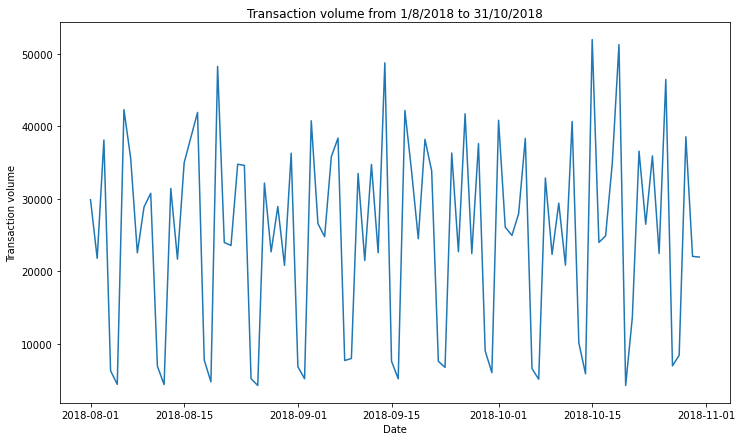

In [51]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

There appears to be a cyclical pattern in transaction volume over the 3 month period. 
My Deductions from this Behaviour is that:
- Salaries are paid out only on certain days of the week
- People tend to spend more during the weekends (shopping, going out with friends etc)

Therefore,in order to further strengthen this , I will create 3 new features from both the date and extraction columns:
- month
- dayofweek
- hour

In [52]:
df["month"] = pd.DatetimeIndex(df['date']).month
df["dayofweek"] = pd.DatetimeIndex(df['date']).dayofweek
df[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In addition to month and day of week, we can also get the hour in which those transactions took place from the extraction column.

- First, I will update the extraction column such that it only contains the time. 
- Then, I will create a new hour column which contains only the hour component of each transaction.

In [53]:
df['extraction'].head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [54]:
df["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in df['extraction']]
df.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [55]:
df["hour"] = [time.split(":")[0] for time in df['extraction']]
df[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [56]:
print("Before: ", df['hour'].dtype)
df["hour"] = pd.to_numeric(df['hour'])
print("After: ", df['hour'].dtype)

Before:  object
After:  int64


# 5. Deep Data Analysis

Now that our dataframe is in a much better shape and we have new features to work with, let's now do a deep dive and see if we can gather any interesting insights about customers' transactional behaviour. 

In [57]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_state,extraction,amount,transaction_id,customer_id,movement,month,dayofweek,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,8,2,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit,8,2,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,debit,8,2,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,debit,8,2,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,debit,8,2,1


## 5.1 Purchases amount and overall amount

In [58]:
purchases_amount = df.loc[(df['txn_description'] == "POS") | (df['txn_description'] == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

Text(0.5, 1.0, 'Purchase transaction amount')

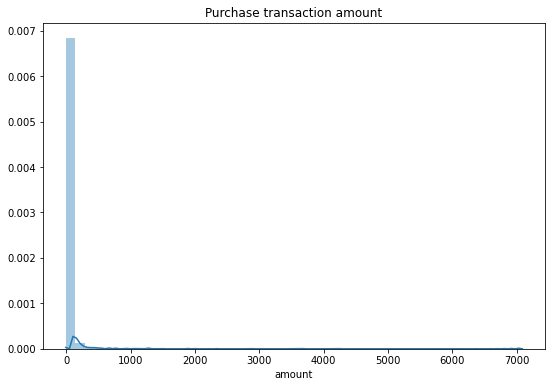

In [59]:
plt.figure(figsize = (9, 6))
sns.distplot(purchases_amount)
plt.title("Purchase transaction amount")

In [60]:
purchases_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

Text(0.5, 1.0, 'Overall transaction amount')

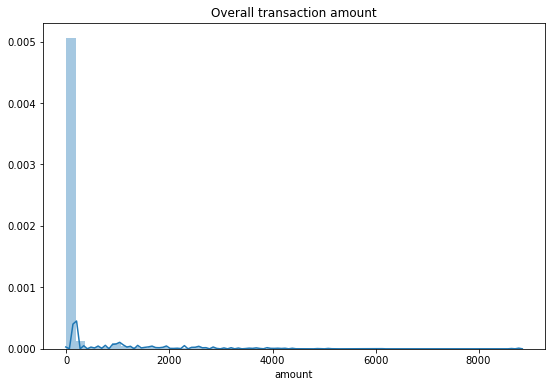

In [61]:
plt.figure(figsize = (9, 6))
sns.distplot(df['amount'])
plt.title("Overall transaction amount")

In [62]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

- So we could say by comparing variance of overall transaction amount and purchases transaction amount that overall variance is higher due to inclusion of salary payments.
- This suggest data possessed real behaviour as salary is included once in a month

## 5.2 Transaction volume per customer

In [65]:
customer_monthly_volume = pd.DataFrame(df.groupby("customer_id").amount.sum() / 3) 
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


Text(0.5, 1.0, "Customers' monthly transaction volume")

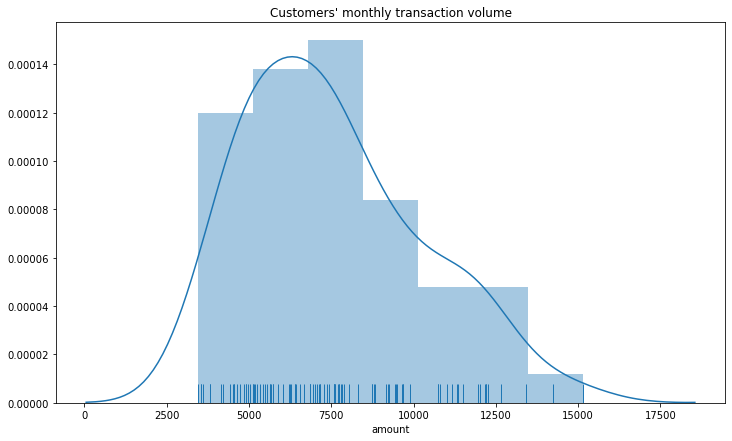

In [67]:
plt.figure(figsize = (12, 7))
sns.distplot(customer_monthly_volume.amount,rug = True)
plt.title("Customers' monthly transaction volume")

## 5.3 Transaction volume over time

Text(0.5, 1.0, 'Average transaction volume by month')

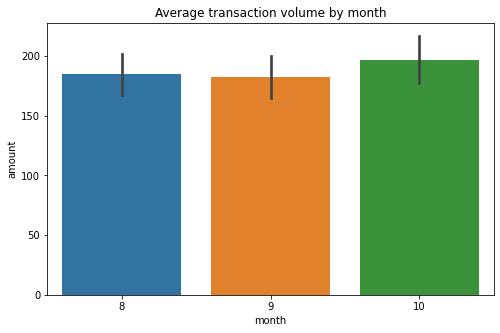

In [68]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "month", y = "amount", data = df)
plt.title("Average transaction volume by month")

In [78]:
average_daily_volume = pd.DataFrame(df.groupby("dayofweek",as_index=True).amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

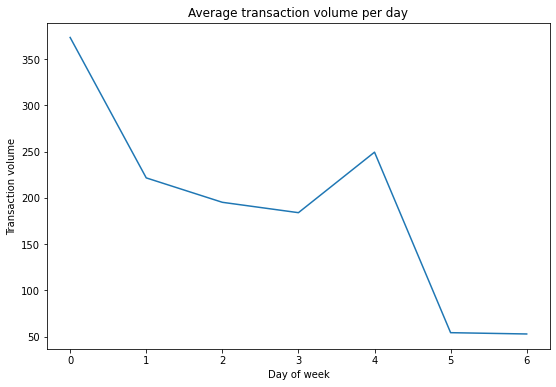

In [79]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

Text(0.5, 0, 'Day of week')

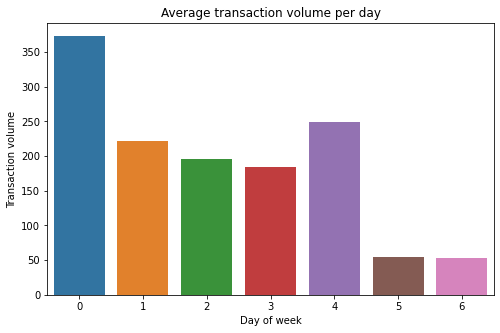

In [80]:
plt.figure(figsize = (8, 5))
sns.barplot(x =average_daily_volume.index,y="amount",data=average_daily_volume)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

__Friday__ and __Saturday__ have the lowest average transaction volume. Let's see a breakdown of these transactions by types of transactions. 

To simplify the categories, I will group all transactions into 3 categories:
- Salary
- Purchase
- Others

In [81]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [82]:
df.loc[df['txn_description'] == "PAY/SALARY", "category"] = "Salary"
df.loc[(df['txn_description'] == "SALES-POS") | (df['txn_description'] == "POS"), "category"] = "Purchase"
df.category.fillna("Others", inplace = True)
df[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

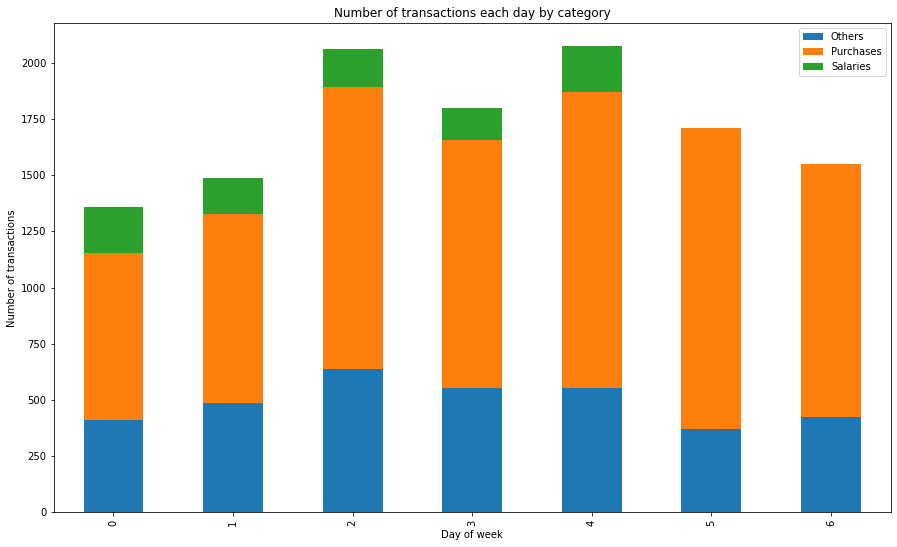

In [92]:
stacked_barplot = pd.DataFrame(df.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (15, 9))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

Group by two categories to get transaction count for each day and each category

In [95]:
stacked_barplot.head()

amount
dayofweek category        
0         Others       411
          Purchase     742
          Salary       207
1         Others       486
          Purchase     841

Need to unstack it so that data could go to proper format suitable for plotting

In [94]:
stacked_barplot.unstack().head()

amount                
category  Others Purchase Salary
dayofweek                       
0          411.0    742.0  207.0
1          486.0    841.0  160.0
2          640.0   1251.0  172.0
3          555.0   1103.0  143.0
4          555.0   1317.0  201.0

__No salaries__ were paid on __Friday and Saturday__, therefore lower average transaction volume on those days.

Also, it does not seem to appear that people spend more on purchases over the weekends. 

In [99]:
average_hourly_volume = pd.DataFrame(df.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

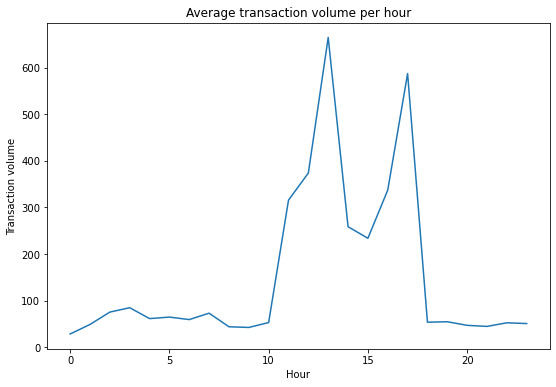

In [103]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Highest transaction volumes happen during the midday and late afternoon. Let's see a breakdown of these transactions by categories. 

Text(0.5, 0, 'Hour')

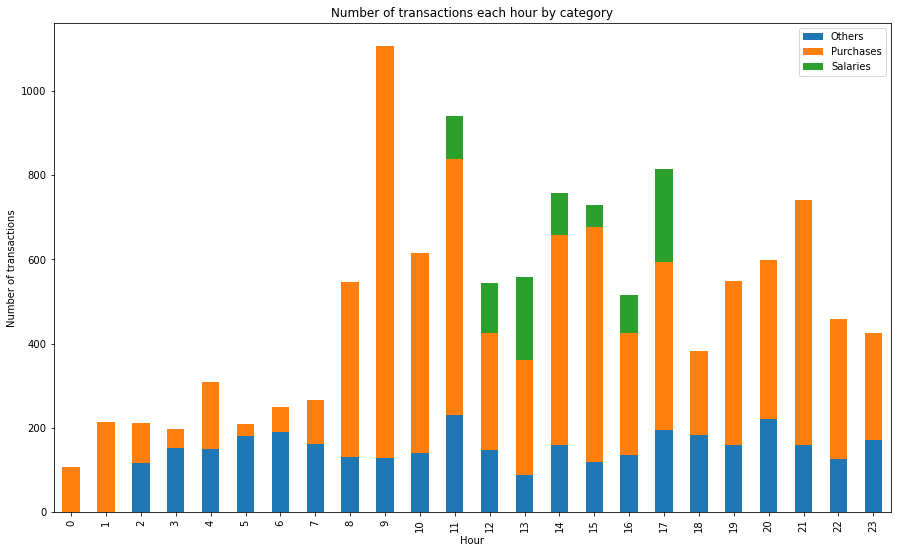

In [105]:
stacked_barplot = pd.DataFrame(df.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (15, 9))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")

- Interesting observation around salary is that comes in between 12-17 hour mostly on 13 and 17 hour

# 6. Save data

Task 1 is done! Saving data for task 2. 

In [79]:
df.to_pickle("data.pkl")

In [81]:
df.to_csv("data.csv",index=False)